In [35]:
import numpy as np
import pandas as pd
import sys
sys.path.append('/home/capstone22/WildFIrePrediction/PwC-LSTM-Capstone-Project/src/')
from roc import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

Data Loading

In [11]:
df_train = pd.read_csv('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/isaac_train.csv')
df_valid = pd.read_csv('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/isaac_valid.csv')
df_test = pd.read_csv('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/isaac_test.csv')

df_2017 = pd.read_csv('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2017_2017.csv')
gt_2017 = pd.read_csv('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2017_2017.csv')
coords = pd.read_csv('/home/capstone22/WildFIrePrediction/isaac_data/LatLon.csv')

df_2017 = df_2017.loc[coords['pixel_id']]
gt_2017 = gt_2017.loc[coords['pixel_id']]

Feature Selection

In [14]:
# selected_features = ['Road_Dist',
#                      'Elec_Dist',
#                      'Cultivated_Prop',
#                      'aet__maximum_Normal',
#                      'aet__mean_Normal',
#                      'aet__minimum_Normal',
#                      'cwd__maximum_Normal',
#                      'cwd__mean_Normal',
#                      'cwd__minimum_Normal',
#                      'pck__maximum_Normal',
#                      'pck__mean_Normal',
#                      'pck__minimum_Normal',
#                      'aet__mean_ThreeYear_Dev',
#                      'cwd__mean_ThreeYear_Dev',
#                      'Mean_Housing_Dens_25km']

selected_features = ['Road_Dist',
                    'Elec_Dist',
                    'aet__mean_Normal',
                    'aet__mean_ThreeYear_Dev',
                    'cwd__mean_Normal',
                    'cwd__mean_ThreeYear_Dev',
                    'Mean_Housing_Dens_25km',
                    'FFWI',
                    'time_since_fire']


Model

In [15]:
X_train = df_train[selected_features]
y_train = df_train['value']

X_valid = df_valid[selected_features]
y_valid = df_valid['value']

X_test = df_test[selected_features]
y_test = df_test['value']

X_test_2017 = df_2017[selected_features]


In [16]:
clf = LogisticRegression().fit(X_train, y_train)

/home/capstone22/WildFIrePrediction/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
np.set_printoptions(suppress=True)
print(y_pred_prob)

[[0.99868976 0.00131024]
 [0.99927174 0.00072826]
 [0.99743084 0.00256916]
 ...
 [0.99152156 0.00847844]
 [0.99631082 0.00368918]
 [0.99603895 0.00396105]]


In [20]:
y_pred_2017 = clf.predict(X_test_2017)
y_pred_prob_2017 = clf.predict_proba(X_test_2017)
np.set_printoptions(suppress=True)
print(y_pred_prob_2017)

fire_prob = y_pred_prob_2017[:, 1]
coords['fire prob'] = fire_prob

[[0.99610391 0.00389609]
 [0.99541074 0.00458926]
 [0.99537632 0.00462368]
 ...
 [0.99846958 0.00153042]
 [0.99841835 0.00158165]
 [0.99711458 0.00288542]]


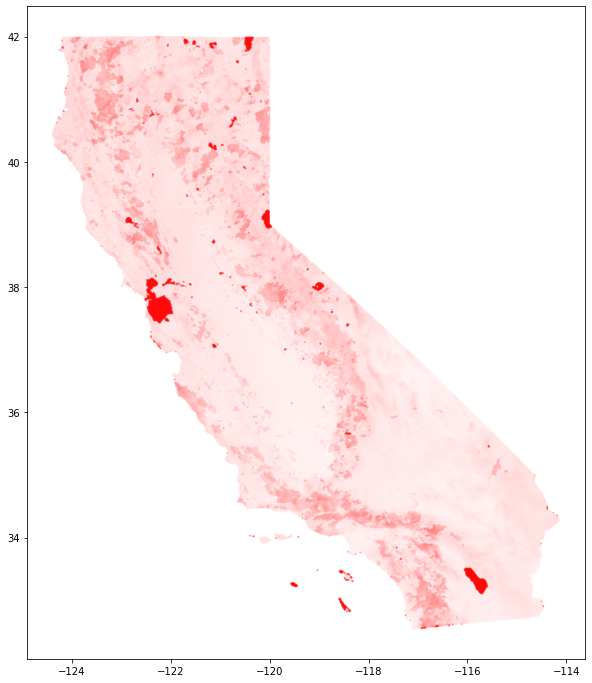

In [43]:
#Prediction heatmap
fig = plt.figure(figsize=(10, 12))
plt.scatter(coords['Longitude'], coords['Latitude'], alpha = 0.2, s = coords['fire prob'], c = 'r')
plt.show()

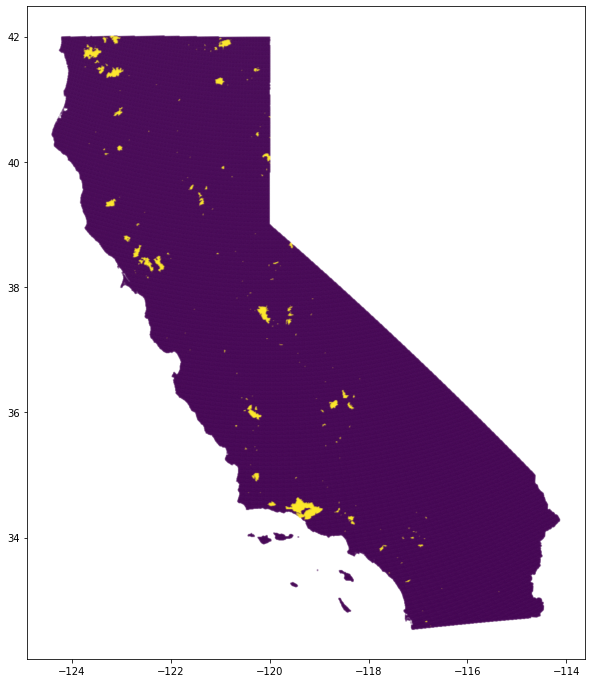

In [44]:
#Ground truth
fig = plt.figure(figsize=(10, 12))
plt.scatter(coords['Longitude'], coords['Latitude'], alpha = 0.2, c = gt_2017['value'], s = 1)
plt.show()

0.9925666666666667
AUC score: 0.5


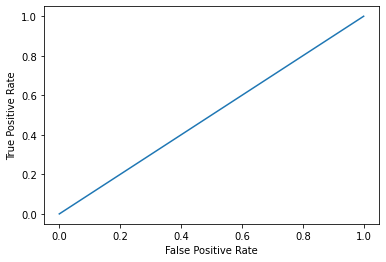

In [56]:
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test, y_pred)

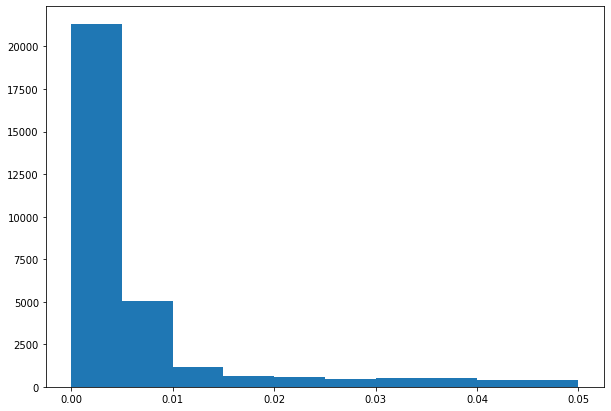

In [71]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(np.clip(y_pred_prob[:, 1], 0, 0.05), bins = [0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05])

# Show plot
plt.show()

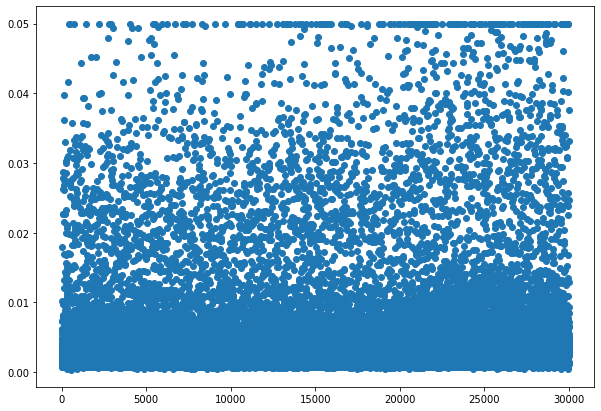

In [58]:
# Creating pixel vs fire prob
fig, ax = plt.subplots(figsize =(10, 7))
ax.scatter(range(1, len(y_pred_prob[:, 1]) + 1), np.clip(y_pred_prob[:, 1], 0, 0.05))
 
# Show plot
plt.show()